In [2]:
import cv2
from MTGCardDetection import getCardName, get_cards_in_set
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

In [5]:
cards, prices = get_cards_in_set('cmr')

In [3]:
import requests

def get_picture(save_path=None):
    url = "http://192.168.178.51/capture"  # Replace <ESP32_CAM_IP> with the actual IP address of your ESP32-CAM
    response = requests.get(url)
    
    if response.status_code == 200:
        if save_path:
            with open(save_path, "wb") as file:
                file.write(response.content)
            print(f"Image saved as {save_path}")
        else:
            image_array = np.frombuffer(response.content, dtype=np.uint8)
            # Decode the image array to an OpenCV image
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
            #img_cropped = image[480:1150, 220:1400]
            return image
    else:
        print("Failed to capture image")
        
def show_image(image):
    # Convert the image from BGR to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # Do not show axes
    plt.show()


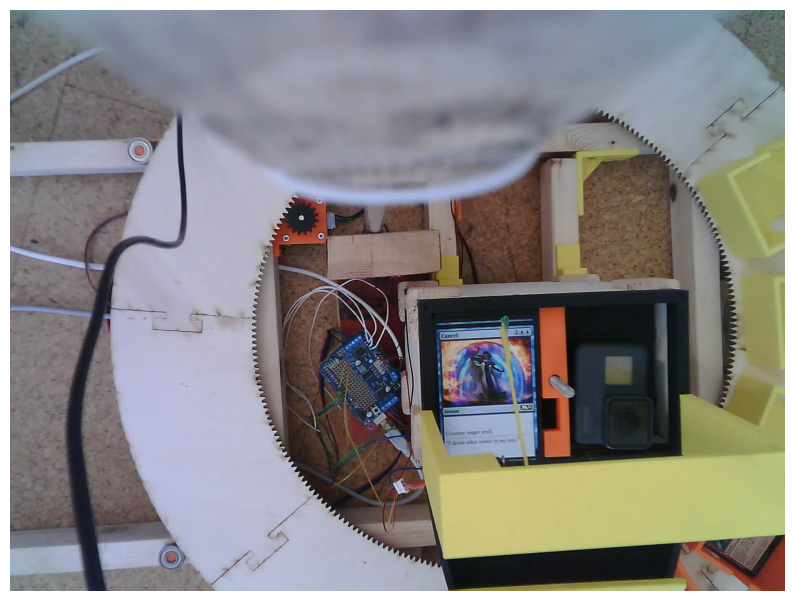

In [9]:
img = get_picture()
name, img_new = getCardName(img, cards, prices)
print(name)
if img_new is not None:
    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()
else:
    print("No image to display")

In [7]:
name, img_new = getCardName(img, cards, prices)
name

'Efreet Flamepainter'

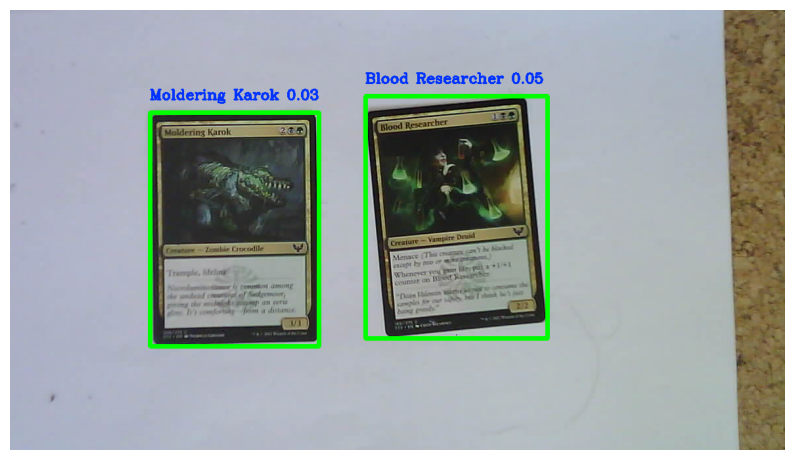

In [16]:
if img_new is not None:
    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()
else:
    print("No image to display")

(1200, 1600, 3)


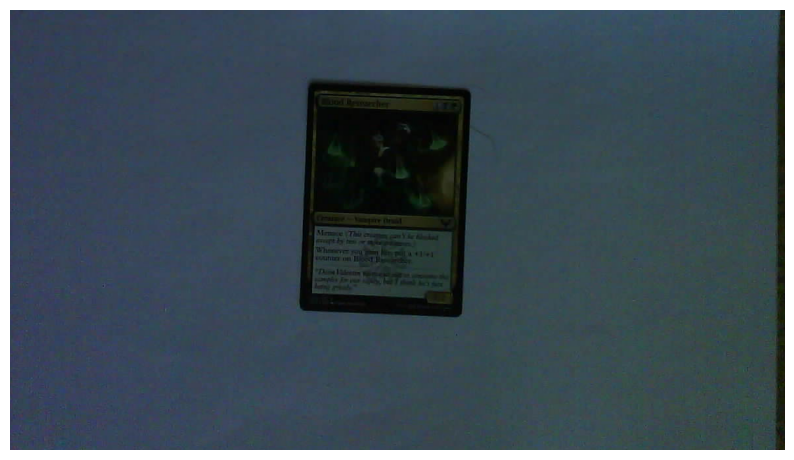

In [44]:
print(img_new.shape)
img_cropped = img_new[480:1150, 220:1400]
show_image(img_cropped)

In [1]:
import requests

def get_card_details(cardname):
    """
    Given a card name, look up the card's details on Scryfall.

    Args:
        cardname (str): The name of the card to look up.

    Returns:
        dict: A dictionary containing the card's details, or None if the card is not found.
    """
    url = f"https://api.scryfall.com/cards/named?exact={cardname}"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.reason}")
        return None

# Example usage:
# card_details = get_card_details("Black Lotus")
# if card_details:
#     print(card_details)

In [4]:
get_card_details('sol ring')

{'object': 'card',
 'id': 'd1d8d32d-ebb2-46c2-b909-b7f71d33159e',
 'oracle_id': '6ad8011d-3471-4369-9d68-b264cc027487',
 'multiverse_ids': [],
 'tcgplayer_id': 562505,
 'name': 'Sol Ring',
 'lang': 'en',
 'released_at': '2024-08-02',
 'uri': 'https://api.scryfall.com/cards/d1d8d32d-ebb2-46c2-b909-b7f71d33159e',
 'scryfall_uri': 'https://scryfall.com/card/mb2/233/sol-ring?utm_source=api',
 'layout': 'normal',
 'highres_image': True,
 'image_status': 'highres_scan',
 'image_uris': {'small': 'https://cards.scryfall.io/small/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f71d33159e.jpg?1723010128',
  'normal': 'https://cards.scryfall.io/normal/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f71d33159e.jpg?1723010128',
  'large': 'https://cards.scryfall.io/large/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f71d33159e.jpg?1723010128',
  'png': 'https://cards.scryfall.io/png/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f71d33159e.png?1723010128',
  'art_crop': 'https://cards.scryfall.io/art_crop/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f

In [6]:
db = sqlite3.connect('cards.db')
db_cursor = db.cursor()

In [22]:
command = '''
INSERT INTO cards (name, set_name)
VALUES ('powerbalance', 'hehe')

'''

In [23]:
db_cursor.execute(command)

In [24]:
table_name = 'cards'  # Replace with your actual table name
query = f"SELECT * FROM {table_name};"

# Execute the query
db_cursor.execute(query)

# Fetch all results
rows = db_cursor.fetchall()

# Get column names
column_names = [description[0] for description in db_cursor.description]

# Create a DataFrame for better readability
df = pd.DataFrame(rows, columns=column_names)

# Display the DataFrame
df

,id,name,set_name
0,1,powerbalance,hehe
1,2,powerbalance,hehe


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 3, 4, 5, 6, 7, 8, 9]
[2, 4, 6, 8]
